# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats as st
import os


sns.set(rc={'figure.figsize':(17,8)}) #Зададим размер фигур построеных с помощью seaborn
np.set_printoptions(threshold=np.inf)
sns.set_palette('dark')
pd.set_option('display.max_columns', None) #Уберем ограничение на максимальное число отображаемых столбцов за раз

## Откройте файл с данными и изучите общую информацию

In [3]:

pth2 = '/datasets/games.csv'
pth1 = 'games.csv'
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Что-то пошло не так')

In [4]:
display(df) #Отобразим датафрейм
df.info() #Отобразим информацию по датафрейму
df.describe() #Отобразим численное описание датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Ознакомившись с датафреймом мы можем заметить следующее:

0. `Name` 
    - Изменить имя столбца [x]
    - Ознакомиться с NaN [x]
1. `Platform` 
    - Изменить имя столбца [x]
    - Ознакомиться с неявными дубликатами и изучить возможные ошибки [x]
2. `Year_of_Release`
    - Мы видим, что минимальный год выпуска 1980. На 0 в UNIX времени это не похоже лучше проверить как много игр вышедших раньше 1995 года. [x]
    - Изучить NaN. [x]
    - Изменить имя столбца [x]
    - Изменить тип на int. В DateTime нет смысла так как нам нужен только год. [x]
3. `Genre`
    - Изменить имя столбца [x]
    - Изучить NaN [x]
    - Ознакомиться с неявными дубликатами и изучить возможные ошибки [x]
4. `NA_sales`
    - Изменить имя столбца [x]
    - Изучить нули. Это ошибка или отсутствующие данные продаж? [x]
5. `JP_sales`
    - Изменить имя столбца [x]
    - Изучить нули. Это ошибка или отсутствующие данные продаж? [x]
6. `EU_sales`
    - Изменить имя столбца [x]
    - Изучить нули. Это ошибка или отсутствующие данные продаж? [x]
7. `Other_sales`
    - Изменить имя столбца [x]
    - Изучить нули. Это ошибка или отсутствующие данные продаж? [x]
8. `Critic_Score`
    - Изучить NaN и понять логику их появления. Принять решение об обработке [x] 
    - Изменить тип на int [x]
    - Изменить имя столбца [x]
9. `User_Score`
    - Изучить NaN и понять логику их появления. Принять решение об обработке [x]
    - Изменить тип с object на int, преобразовав оценку к critic_score [x]
    - Изменить имя столбца [x]
10. `Rating`
    - Изменить имя столбца [x]
    - Изучить NaN и понять логику их появления. Принять решение об обработке [x] 
    - Изучить неявные дубликаты [x]
    - Изучить пропуски, принять решение об обработке [x]

## Подготовьте данные

Для начала изменим имена столбцов, так как это нужно сделать везде.

In [6]:
df.columns = df.columns.str.lower()# Переименуем колонки

<div class="alert alert-success"> 
<h2> Комментарий ревьюера VERS#1 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
На данном шаге для приведения названий колонок к нижнему регистру можно использовать такую конструкцию: data.columns = data.columns.str.lower()

Далее начнем обработку столбцов

`name` - изучим NaN

In [7]:
display(df.loc[df['name'].isna()]) # Отобразим пропуски в названиях

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Есть две неизвестные игры, вышедшие на Genesis, 1993 года. Хотя у нас есть данные по продажам остальных данных нет. Для анализа современного рынка нам в целом не нужны настолько старые игры. Исходя из этого мы удалим данные строки

In [8]:
df = df.dropna(subset=['name']).reset_index(drop=True) #Уберем пропуски и обновим индексацию

`platform` - ознакомиться с неявными дубликатами и изучить возможные ошибки

In [9]:
df['platform'].unique() # Отобразим уникальные значения

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Мы не видим неявных дубликатов, однако видим множество платформ которые не актуальны. В рамках планирования продвижения игр, нельзя опираться на настолько старые данные, так как игровая индустрия сейчас, выглядит совсем иначе. 

`year_of_release` 
- изучить корректность дат выхода игр после 1995 года
- изучить NaN

In [10]:
display(df.loc[df['year_of_release'] < 1996].head(30)) #Выведем первые 30 строк с годом меньше 1996
display(df.loc[df['year_of_release'] < 1996].tail(50)) #Выведем последние 30 строк с годом меньше 1996

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,6.16,2.04,2.69,0.29,NaN,NaN,NaN
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN
71,Donkey Kong Country,SNES,1994.0,Platform,4.36,1.71,3.00,0.23,NaN,NaN,NaN
76,Super Mario Kart,SNES,1992.0,Racing,3.54,1.24,3.81,0.18,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13494,Sotsugyou II: Neo Generation,PS,1995.0,Simulation,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13510,Virtua Fighter CG Portrait Series Vol.6: Lau Chan,SAT,1995.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13570,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13593,Go Go Ackman 3,SNES,1995.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13756,Novastorm,PS,1995.0,Shooter,0.02,0.02,0.00,0.00,NaN,NaN,NaN
13766,World Series Baseball,SAT,1994.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13778,Metal Max Returns,SNES,1995.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13796,Zen-Nippon GT Senshuken,SNES,1995.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13854,Thoroughbred Breeder II Plus,PS,1995.0,Simulation,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13898,Tokimeki Mahjong Paradise: Koi no Tenpai Beat,SAT,1995.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Часть игр, в самом начале находятся в списке корректно, однако множество игр внизу списка находятся там некорректно. У них неправильный год выхода, жанры и платформы. Однако они в основном достаточно старые. Для корректной работы с датафреймом нужно будет определить переходный период для современной игровой индустрии.

In [11]:
display(df.loc[df['year_of_release'].isna()]) #Выведем пропуски

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


NaN в дате выхода составляют менее 3%. Лучше удалить их, чтобы некорректные значения не мешали анализу данных. Даже беглого взгляда на отсуствующие значения, хватает понять, что там достаточно много игр, которые вышли давно (Например Fifa 2004 или Space invaders)

In [12]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True) #Удалим пропуски

`genre` 
- Изучить NaN 
- Ознакомиться с неявными дубликатами и изучить возможные ошибки

In [13]:
df['genre'].unique() #Отобразим уникальные значения

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов нет

In [14]:
display(df.loc[df['genre'].isna()]) #Отобразим пропуски

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Игры слишком старые, можно смело удалять

In [16]:
df = df.dropna(subset=['genre']).reset_index(drop=True) #Удалим пропуски

`na_sales`
- Изучить нули. Это ошибка или отсутствующие данные продаж? 

In [17]:
display(df.loc[df['na_sales'] == 0].head(30)) #Осмотрим нули 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
214,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
339,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
383,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
401,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
426,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
526,Dragon Quest V: Tenkuu no Hanayome,SNES,1992.0,Role-Playing,0.0,0.00,2.78,0.01,NaN,NaN,NaN
559,Yokai Watch 2 Shinuchi,3DS,2014.0,Role-Playing,0.0,0.00,2.68,0.00,NaN,NaN,NaN
570,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,0.0,0.00,2.65,0.00,NaN,NaN,NaN
626,Final Fantasy V,SNES,1992.0,Role-Playing,0.0,0.00,2.43,0.02,NaN,NaN,NaN
666,Dragon Warrior Monsters,GB,1998.0,Role-Playing,0.0,0.00,2.34,0.01,NaN,NaN,NaN


Таких игр достаточно много. В целом почти все игры скорее всего не выходили на территории Северной Америки или выходили под другим названием, что в целом абсолютно нормально. 

Так же игра могла выйти но не набрать и 10 000 проданных копий, чтобы попасть в данный датафрейм. Однако мы снова можем увидеть странные значения вроде Mafia II вышедшей на PS2 в 2006 году, чего не могло быть.

Более правильным будет оставить данные зачения без изменений

`eu_sales`
- Изучить нули. Это ошибка или отсутствующие данные продаж? 

In [18]:
display(df.loc[df['eu_sales'] == 0].head(30)) #Осмотрим нули

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
148,Final Fantasy XII,PS2,2006.0,Role-Playing,1.88,0.0,2.33,1.74,92.0,7.6,T
214,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN
267,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,1.46,0.0,0.83,1.93,91.0,9.3,M
283,Half-Life,PC,1997.0,Shooter,4.03,0.0,0.09,0.00,96.0,9.1,M
315,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.0,3.77,0.00,NaN,NaN,NaN
339,Friend Collection,DS,2009.0,Misc,0.00,0.0,3.67,0.00,NaN,NaN,NaN
348,Pro Evolution Soccer 2008,PS2,2007.0,Sports,0.05,0.0,0.64,2.93,82.0,7.9,E
383,Monster Hunter 4,3DS,2013.0,Role-Playing,0.00,0.0,3.44,0.00,NaN,NaN,NaN
386,Final Fantasy III,SNES,1994.0,Role-Playing,0.86,0.0,2.55,0.02,NaN,NaN,NaN
410,Yokai Watch 2 Ganso/Honke,3DS,2014.0,Role-Playing,0.09,0.0,3.18,0.01,NaN,NaN,NaN


Скорее всего причина та же самая, игра не выходила официально на территории Европы или выходила под другим названием

`jp_sales`
- Изучить нули. Это ошибка или отсутствующие данные продаж? 

In [19]:
display(df.loc[df['jp_sales'] == 0].head(30)) #Осмотрим нули 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008.0,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.0,0.73,49.0,8,E10+
116,Just Dance 4,Wii,2012.0,Misc,4.05,2.16,0.0,0.55,74.0,7.3,E10+
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.0,0.00,93.0,7.3,T
155,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,3.57,1.55,0.0,0.51,80.0,8.9,E10+
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.0,0.47,97.0,7.9,M


Тоже самое, игры не выходили на территории Японии или выходили под другим названием

`other_sales`
- Изучить нули. Это ошибка или отсутствующие данные продаж? 

In [20]:
display(df.loc[df['other_sales'] == 0]) #Осмотрим нули 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.0,93.0,7.3,T
214,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.00,4.87,0.0,NaN,NaN,NaN
283,Half-Life,PC,1997.0,Shooter,4.03,0.00,0.09,0.0,96.0,9.1,M
287,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,2.57,1.52,0.00,0.0,91.0,7.9,T
315,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.00,3.77,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN


Тоже самое, игры не выходили на территории Японии или выходили под другим названием, или нет данных продаж из других регионов.

`critic_score`
    - Изучить NaN и понять логику их появления. Принять решение об обработке 

In [21]:
display(df.loc[df['critic_score'].isna()].head(50)) #Изучим NaN
display(df.loc[df['critic_score'].isna()].tail(30)) #Изучим NaN

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16407,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.0,NaN,NaN,T
16408,XI Coliseum,PSP,2006.0,Puzzle,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16409,Kyoukai no Shirayuki,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16410,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.0,NaN,8.1,K-A
16411,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16412,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16413,7'scarlet,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16414,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16415,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16416,Neo Angelique Special,PSP,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Среди NaN игры разных категорий, платформ и годов выпуска. Есть как известные игры, так и культовые и неизвестные. Их нельзя объединить в какой то 1-2 критерия. 
Из чего можно сделать вывод, что отсуствующие значения действительно отсутствуют в том источнике, откуда интернет магазин подтягивает оценки. 
Заменим их на некий маркер, например `999`. Такой оценки точно не может быть и мы сможем всегда сделать срез данных без маркера

In [24]:
df['critic_score'] = df['critic_score'].fillna(999) #Заполним пропуски

`user_score`
    - Изучить NaN и понять логику их появления. Принять решение об обработке


In [25]:
display(df.loc[df['user_score'].isna()].head(50)) #Изучим NaN
display(df.loc[df['user_score'] == 'tbd'].head(30)) #Изучим tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,999.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,999.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,999.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,999.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,999.0,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,999.0,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,999.0,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,999.0,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,999.0,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,999.0,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,999.0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,999.0,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,999.0,tbd,E
716,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,999.0,tbd,E10+
810,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
870,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,999.0,tbd,E
1036,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1037,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,999.0,tbd,E


Среди NaN игры разных категорий, платформ и годов выпуска. Есть как известные игры, так и культовые и неизвестные. Их нельзя объединить в какой то 1-2 критерия. 
Из чего можно сделать вывод, что отсуствующие значения действительно отсутствуют в том источнике, откуда интернет магазин подтягивает оценки. 
Заменим их на некий маркер, например `999`. Такой оценки точно не может быть и мы сможем всегда сделать срез данных без маркера.

Так же есть `tbd` - это параметр для более честных оценок, чтобы один пользователь поставивший 1 балл или 10 не уводил оценку в топы сайта. Для metacritic например это параметр 4 оценки критика. Мы так же примем его за `NaN` и переведем в маркер

In [26]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan #Присваиваем NaN
df['user_score'] = df['user_score'].fillna(999) #Заполняем пропуски

`rating`
    - Изучить NaN и понять логику их появления. Принять решение об обработке [x] 
    - Изучить неявные дубликаты [x]

In [27]:
display(df.loc[df['rating'].isna()].head(50)) #Изучим NaN
display(df.loc[df['rating'].isna()].tail(30)) #Изучим NaN
display(df['rating'].unique()) #Изучим уникальные значения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,999.0,999,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,999.0,999,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,999.0,999,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,999.0,999,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,999.0,999,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,999.0,999,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,999.0,999,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,999.0,999,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,999.0,999,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,999.0,999,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16403,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.0,999.0,999,NaN
16404,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,0.01,0.00,0.00,0.0,999.0,999,NaN
16405,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.0,999.0,999,NaN
16406,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.0,999.0,999,NaN
16408,XI Coliseum,PSP,2006.0,Puzzle,0.00,0.00,0.01,0.0,999.0,999,NaN
16409,Kyoukai no Shirayuki,PSV,2016.0,Action,0.00,0.00,0.01,0.0,999.0,999,NaN
16411,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.0,999.0,999,NaN
16412,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,999.0,999,NaN
16413,7'scarlet,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,999.0,999,NaN
16414,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.0,999.0,999,NaN


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

`E` - Everyone ранее KA от 6-ти лет

`M` - Mature от 17 лет

`T` - teen от 13 лет

`E10+` - от 10 и более

`K-A` - ныне E

`AO` - Adults Only 18+

`EC` - Early Childhood от 3-х лет

`RP` - Rating Pending рейтинг пока не присвоен.

Исходя из этого, мы заменим K-A на E так как это неявный дубликат

Среди NaN игры разных категорий, платформ и годов выпуска. Есть как известные игры, так и культовые и неизвестные. Их нельзя объединить в какой то 1-2 критерия. 
Из чего можно сделать вывод, что отсуствующие значения действительно отсутствуют в том источнике, откуда интернет магазин подтягивает оценки. 
Заменим их на некий маркер, например `999`. Такой оценки точно не может быть и мы сможем всегда сделать срез данных без маркера.

In [28]:
df['rating'] = df['rating'].fillna(999) #Заполним пропуски
df = df.replace({'K-A':'E'}) #Заменим неявный дубликат 

Изменение типов

In [29]:
df['year_of_release'] = df['year_of_release'].astype('int64') #Изменим тип
df['user_score'] = df['user_score'].astype('float') * 10 #Изменим тип
df['user_score'] = df['user_score'].astype('int64') #Изменим тип
df['critic_score'] = (df['critic_score']).astype('int64') #Изменим тип
df['year_of_release'] = df['year_of_release'].astype('int64') #Изменим тип

Для дальшнего анализа, нам понадобится посчитать суммарные продажи во всех регионах.
Создадим для этого отдельный столбец `total_sales`

In [30]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #Добавим столбец с сумарными продажами

In [31]:
df.info() #Изучим датафрейм

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  int64  
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.5+ MB


### Вывод

В результате обработки данных, мы обратили внимание, что есть часть данных, которая отражает несуществующие игры, с неправильными датами выхода, жанрами и платформами. Зачастую эти игры находятся среди старых игр. 

Это приводит нас к необходимости отрезать старые данные, чтобы избежать попадая лишних значений, так как неизвестно, ошибка там только в названии или во всех данных в целом.

## Исследовательский анализ данных

Ранее мы замечали, что часть данных выгрузилась явно с ошибками, причем в основном это касатеся старых игр. Нам нужно понять как распределяется количество релизов в зависимости от года. Построим гистограмму

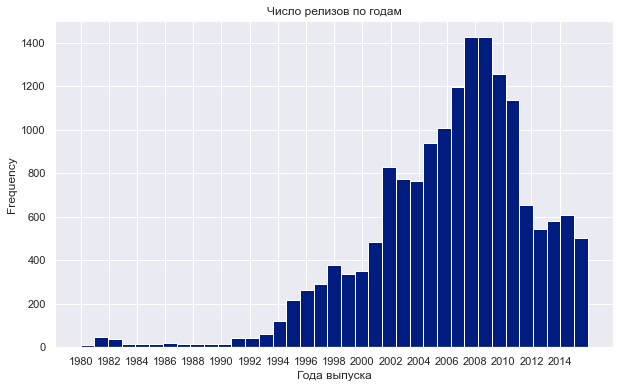

In [32]:
plt.title('Число релизов по годам')
plt.xlabel('Года выпуска')
plt.ylabel('Количество релизов')
df['year_of_release'].plot(kind='hist',bins=37,xticks=range(1980,2016,2), figsize=(10,6), grid=True) #Построим гистограмму
plt.show()

Мы можем увидеть два момента:
1. Гистограмма распределена нормально
2. Мы можем увидеть рост количества выпущеннных игр в 2002 году. Однако на самом деле, нужно понимать, что игр ранее выходило на самом деле намного больше, просто из за более слабо развитого интернета, множество релизов просто не осталось в базах данных. Но можно сказать что так как мы анализируем то, что есть. правильней будет отсечь игры до 2001 года.
    
Однако нужно понять, насколько данные после 2001 года актуальны на текущий момент, чтобы спрогнозировать 2017 год. Для этого посмотрим, на какие платформы выходила большая часть игр. Их достаточно много по этому для начала посмотрим, все ли нам нужны или были явно неудачные?

In [33]:
pivot_list = df['total_sales'].groupby(df['platform']).sum().sort_values() #Создадим столбец с продажами всех платформ
display(pivot_list)

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

,max,min,total_life
platform,,,
2600,1989,1980,9
NES,1994,1983,11
GEN,1994,1990,4
SNES,1999,1990,9
SAT,1999,1994,5
GB,2001,1988,13
N64,2002,1996,6
PS,2003,1994,9
GBA,2007,2000,7


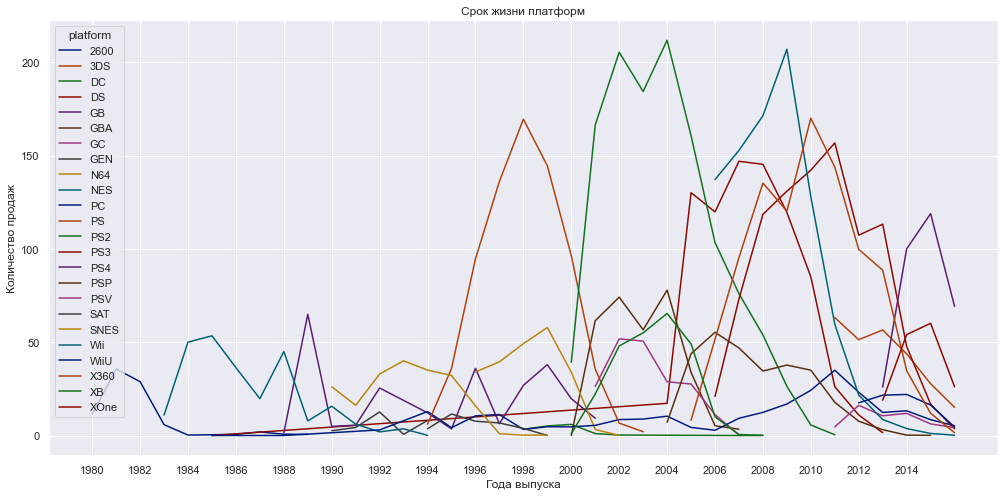

In [35]:
pivot_list = pivot_list.where(pivot_list > 2).dropna() #Сократим список заменив ненужные значение на пропуск и удалим их
pivot_platform = df.loc[df['platform'].isin(pivot_list.index)].pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')#Изменим тип создадим сводную таблицу 
life = pivot_platform.reset_index().pivot_table(index='platform', values='year_of_release', aggfunc = ['max','min']) #Создадим таблицу в которой посчитаем время жизни платформы
life['total_life'] = life['max'] - life['min'] #Посчитаем время жизни платформы
life.columns = life.columns.droplevel(1) #Удалим двухэтажное название столбца
display(life.sort_values(by='max', ascending=True))

pivot_platform = pivot_platform.reset_index() #Уберем индексы для того, чтобы sns сработал


plt.title('Срок жизни платформ')
plt.xlabel('Года выпуска')
plt.ylabel('Количество продаж')
graph = sns.lineplot(data = pivot_platform, x='year_of_release', y='total_sales', hue='platform', palette = 'dark') #Построим линейных график
graph.set_xticks(range(1980,2016,2))
plt.show()

По графику к сожалению мало что можно сказать из за обилия платформ. Но осмотр датафрейма, где указана дата релиза платформы и последняя вышедшая для нее игра показывает, что если не брать PC, то последнее поколение консолей заканчивает срок своей жизни, разумным значением является 2014 год. 

Следовательно мы откидываем все значения до 2014 года. Так как релизы прошлых лет происходили на более не актуальные платформы и могут исказить информацию, так как в разные периоды времени популярные разные жанры игр и разная культура потребления, кроме того чем старше игра тем больше продаж она набирает с течением времени, что так же может исказить выводы

In [36]:
print('Число игр в таблице до 2014 года:',df.query('year_of_release < 2014')['name'].count()) 
good_data = df.query('year_of_release > 2013') #Cделаем срез данных
print('После удаления останется:', good_data['name'].count())
print('Средний срок жизни платформы:',life['total_life'].mean())

Число игр в таблице до 2014 года: 14755
После удаления останется: 1689
Средний срок жизни платформы: 9.541666666666666


Изучим, какие платформы из оставшихся лидируют по продажам, посмотрим, растут ли их показатели или падают

In [37]:
pivot_list = good_data['total_sales'].groupby(df['platform']).sum().sort_values() #Создадим лист с суммой всех продаж по платформам
display(pivot_list)

platform
PSP       0.36
Wii       5.07
PSV      22.40
PC       27.05
WiiU     42.98
X360     48.22
PS3      68.18
3DS      86.68
XOne    140.36
PS4     288.15
Name: total_sales, dtype: float64

Изучим платформы с количеством продаж 10+ млн.

In [38]:
pivot_list = pivot_list.where(pivot_list > 10).dropna() #Уберем платформы где продаж менее 100 млн 
pivot_platform = good_data.loc[df['platform'].isin(pivot_list.index)].pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
#Создадим сводную таблицу, где посчитаем для каждой платформы количество продаж по годам
display(pivot_platform)

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

Изучим число продаж в каждой платформе по годам отдельно друг от друга.

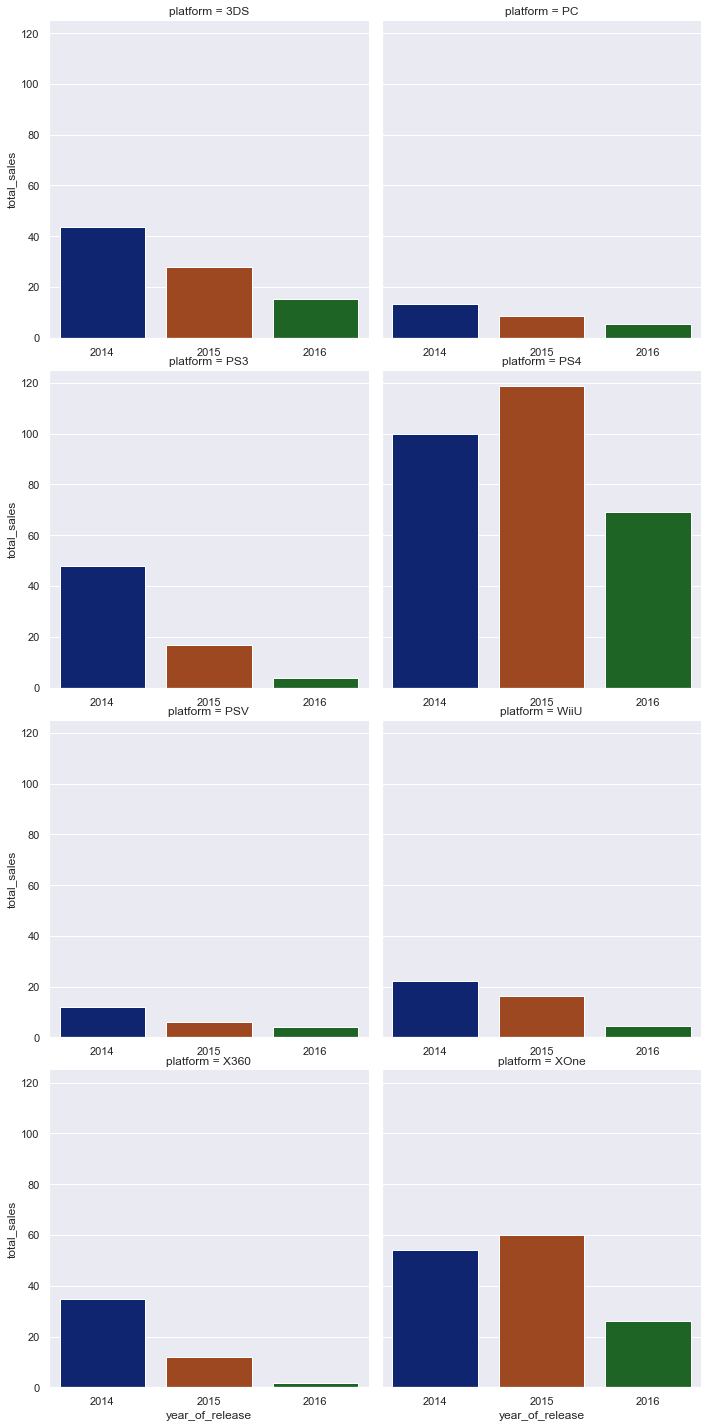

In [39]:
pivot_platform = pivot_platform.reset_index() #Уберем индексы для кооректной работы
g = sns.catplot(x="year_of_release", y="total_sales", col="platform", data=pivot_platform, kind="bar", col_wrap=2) #Построим несколько стобчатых графиков

for ax in g.axes:
    ax.set_xticklabels(range(2014,2017), rotation=0) 
    ax.tick_params(labelbottom=True) #Включим отображение размерности x - оси 


По каждой платформе мы можем сделать следующие выводы:

- 3DS - Продажи с 2014 года падают 
- PС - Исторически продажи в данном рынке достаточно стабильны, но небольшие, виден явный нисходящий тренд
- PS3 - В 2017 году будет полностью неактуальна, так как заменяется на PS4
- PS4 - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год.
- PSP - Продажи с 2014 года падают
- WiiU - Продажи с 2014 года падают
- X360 - К 2017 будет почти полностью заменена на XOne, виден сильный нисходящий тренд
- XOne - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год. Однако рост медленнее чем у PS4

В рамках поставленной задачи, необходимо оставить только платформы, которые актуальны на текущий момент. Либо их жизненный цикл подходит к концу, это :
PC
PS3
PS4
X360
XOne

В дальшнейшем мы будем изучать именно эти платформы та как:

3DS - нишевая приставка, разработка игр под нее и под большие приставки не сочетается друг с другом.

PSV портативная приставка со своей спецификой рынка (многие жанры просто отсусттвуют), а так же явно виден нисходящий тренд

WiiU консоль уникальна по игре в нее, феномен Wii со своей спецификой рынка семейных развлечений + уникальной разработкой игр не подходит для всестороннего анализа и разработки игры под широкую аудиторию, а так же явно виден нисходящий тренд

In [40]:
goodest_data = good_data.query('platform in ["PC","PS3","PS4","X360","XOne"]') #Оставим только актуальные платформы
final_pivot = goodest_data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()
#Cоздадим сводную таблицу с числом продаж по годам и платформам 
display(final_pivot)

,platform,year_of_release,total_sales
0,PC,2014,13.28
1,PC,2015,8.52
2,PC,2016,5.25
3,PS3,2014,47.76
4,PS3,2015,16.82
5,PS3,2016,3.60
6,PS4,2014,100.00
7,PS4,2015,118.90
8,PS4,2016,69.25
9,X360,2014,34.74


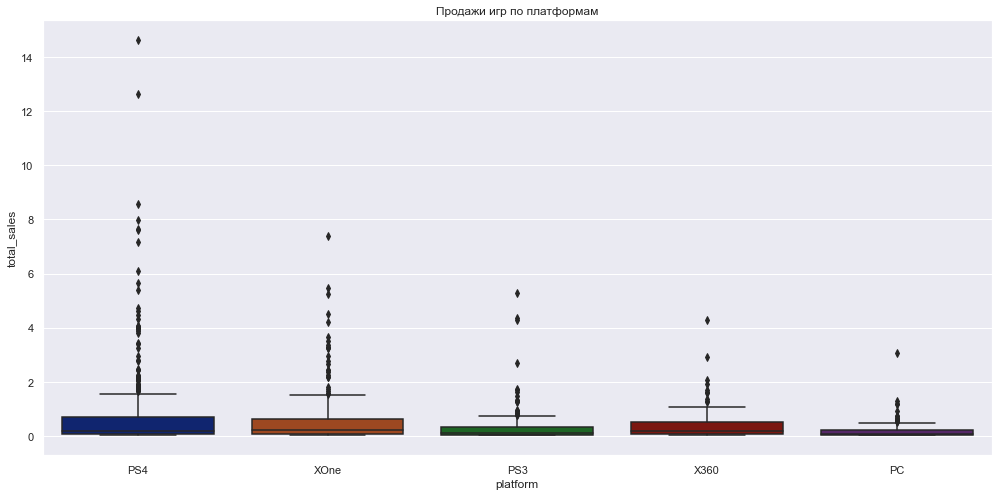

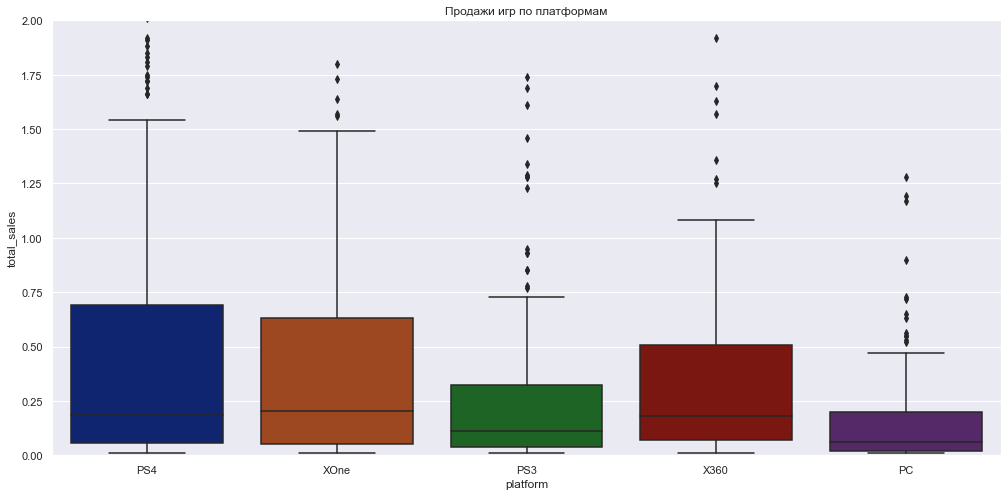

In [41]:
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
sns.boxplot(x="platform", y='total_sales', data=goodest_data) #Постоим ящик с усами
plt.show()


plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
sns.boxplot(x="platform", y='total_sales', data=goodest_data) #Постоим ящик с усами
plt.ylim(0,2)
plt.show()

Как мы видим аномальными можно считать значения продаж по платформам
- PS4 - больше 1.6 млн 
- Xone - больше 1.5 млн
- PS3 - больше 750 000 тыс 
- Xbox 360 - больше 1.1 млн
- PC - больше 450 000 тыс

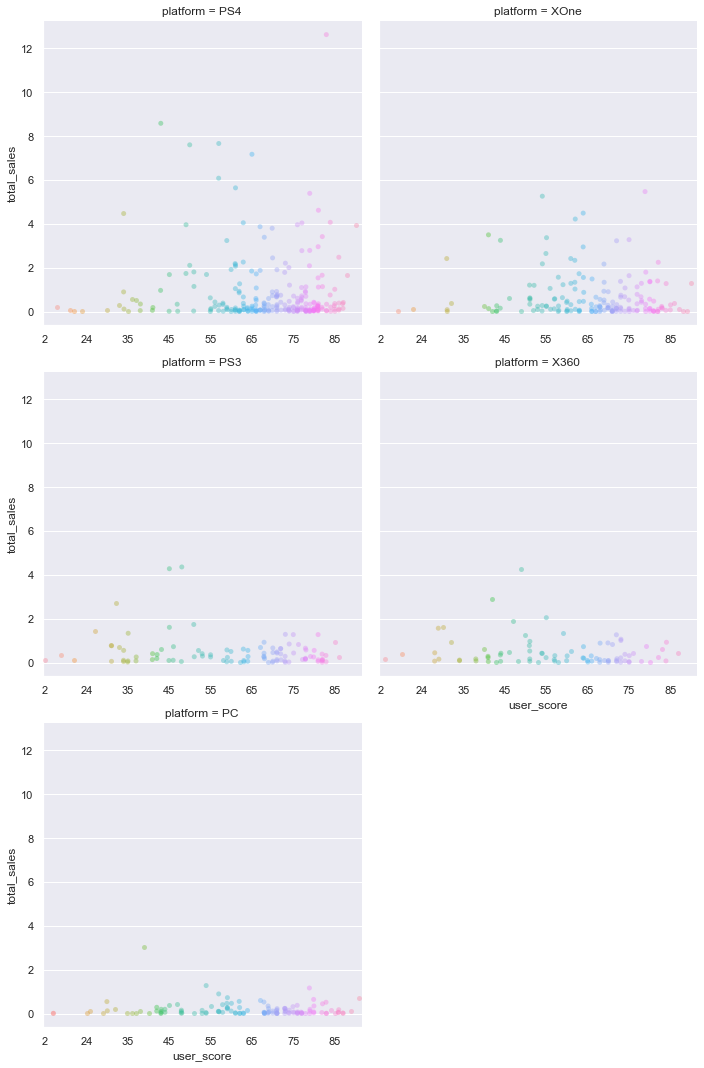

In [42]:
g2 = sns.catplot(data=goodest_data.query('user_score < 999'), col='platform', x='user_score', y='total_sales', col_wrap=2, alpha=0.4)
#Построим диаграммы рассеивания для пользовательских оценок

for ax in g2.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.tick_params(labelbottom=True)

Мы можем увидеть, что хотя между хорошими оценками пользователей и количеством продаж видна связь, она достаточно слабая, действительно игру с хорошими оценками покупают чаще, однако это может являться как раз следствием обратного. Популярную игру пользователи оценивают лучше.

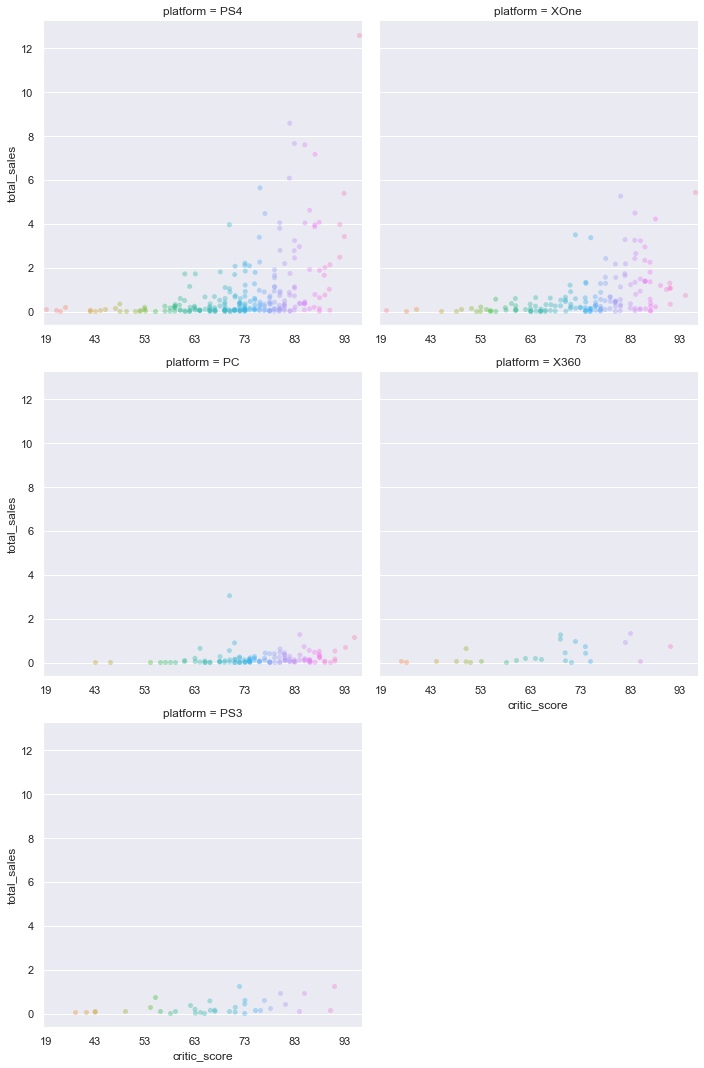

In [43]:
g2 = sns.catplot(data=goodest_data.query('critic_score < 999'), col='platform', x='critic_score', y='total_sales', col_wrap=2, alpha=0.4)
#Построим диаграммы рассеивания для оценок критиков

for ax in g2.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.tick_params(labelbottom=True)

Между хорошими оценками критиков и хорошими продажами сразу видна связь. Это связано с тем, что многие критики ведут, свои блоги, ютуб-каналы, являются журналистами и их положительный отзыв достигает большей аудитории, чем пользовательская оценка

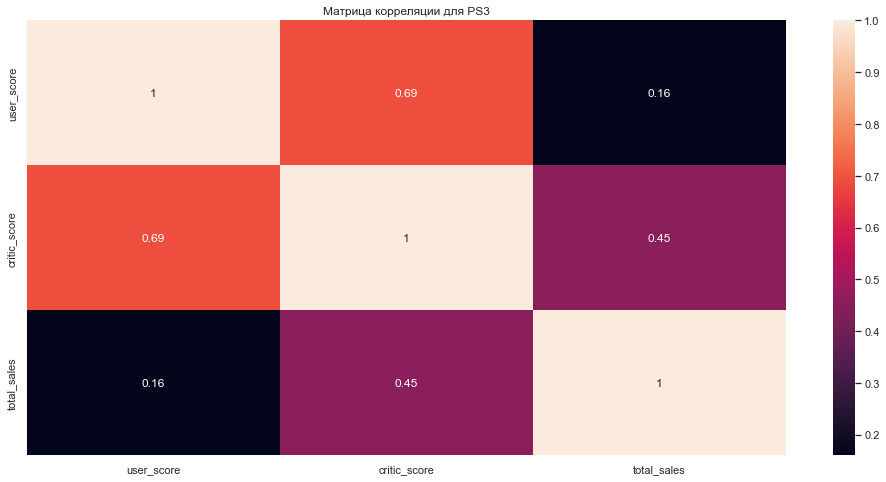

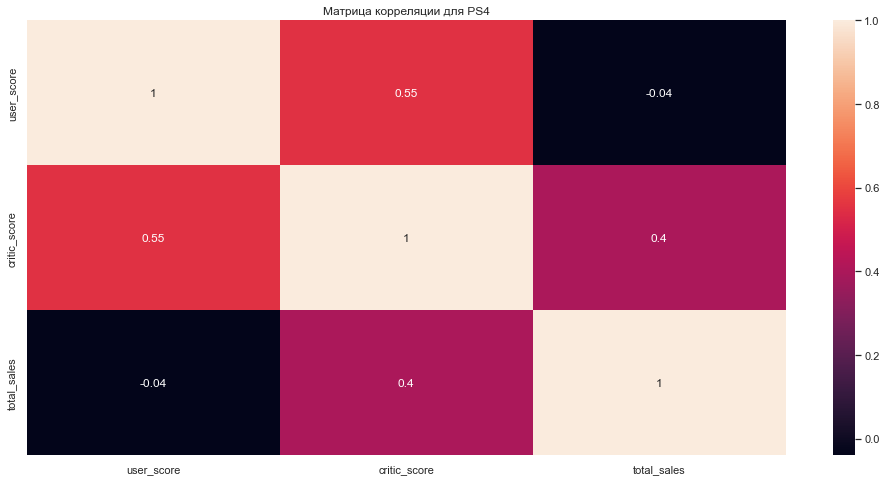

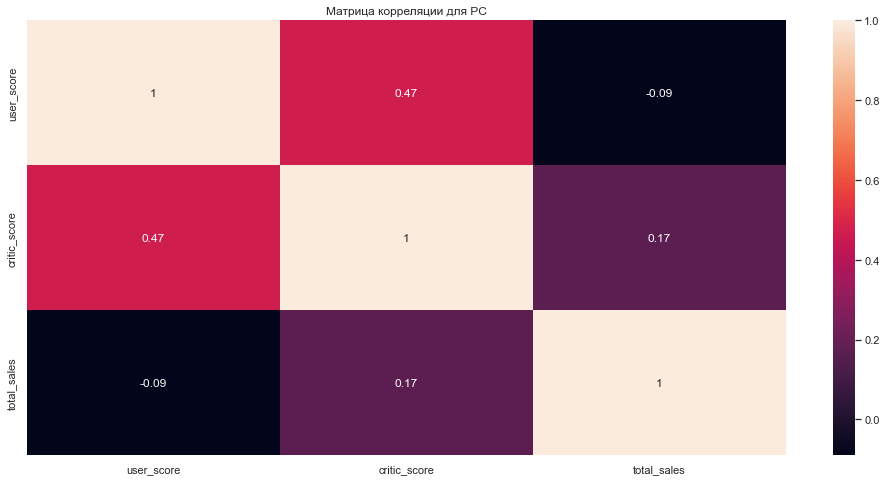

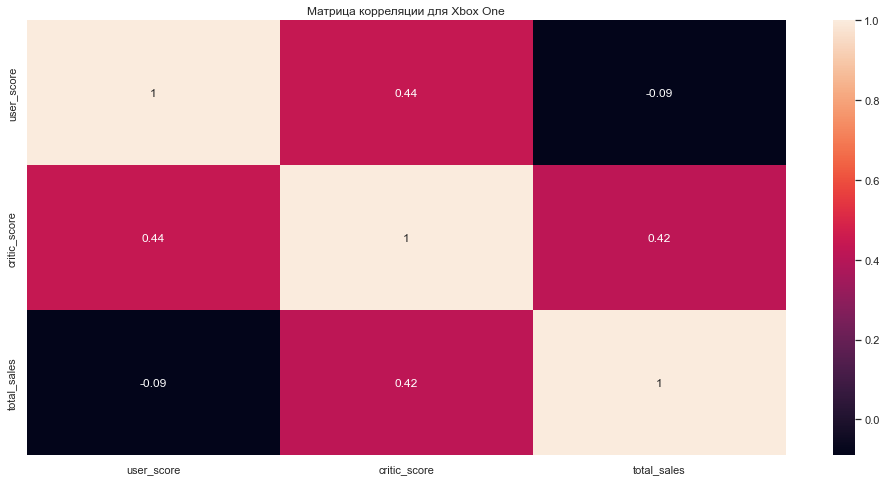

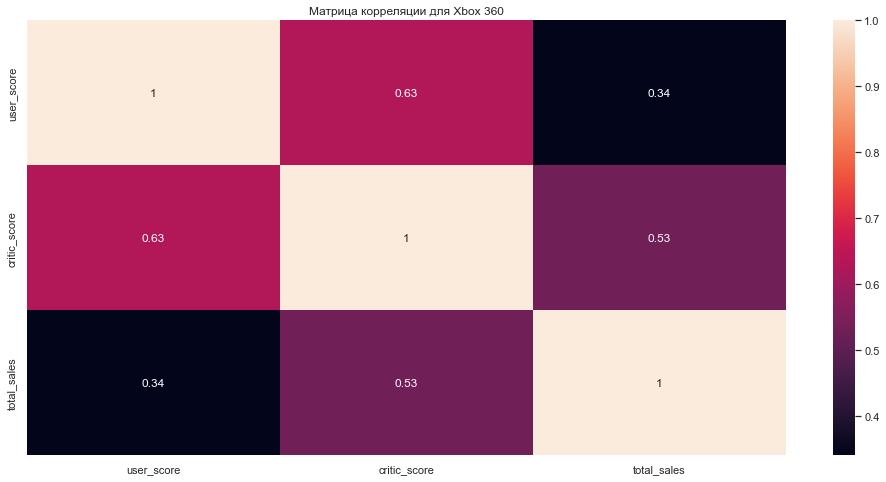

In [44]:
goodest_data_corr = goodest_data.query('user_score < 999 and critic_score < 999 and platform == "PS3"') #Подготовим данные убрав маркеры
sales_corr = goodest_data_corr[['user_score','critic_score','total_sales']].corr().round(2) #Создадим матрицу корреляции
plt.title('Матрица корреляции для PS3')
sns.heatmap(sales_corr, annot=True) #Выведем матрицу в удобном виде
plt.show()

goodest_data_corr = goodest_data.query('user_score < 999 and critic_score < 999 and platform == "PS4"') #Подготовим данные убрав маркеры
sales_corr = goodest_data_corr[['user_score','critic_score','total_sales']].corr().round(2) #Создадим матрицу корреляции
plt.title('Матрица корреляции для PS4')
sns.heatmap(sales_corr, annot=True) #Выведем матрицу в удобном виде
plt.show()

goodest_data_corr = goodest_data.query('user_score < 999 and critic_score < 999 and platform == "PC"') #Подготовим данные убрав маркеры
sales_corr = goodest_data_corr[['user_score','critic_score','total_sales']].corr().round(2) #Создадим матрицу корреляции
plt.title('Матрица корреляции для PC')
sns.heatmap(sales_corr, annot=True) #Выведем матрицу в удобном виде
plt.show()

goodest_data_corr = goodest_data.query('user_score < 999 and critic_score < 999 and platform == "XOne"') #Подготовим данные убрав маркеры
sales_corr = goodest_data_corr[['user_score','critic_score','total_sales']].corr().round(2) #Создадим матрицу корреляции
plt.title('Матрица корреляции для Xbox One')
sns.heatmap(sales_corr, annot=True) #Выведем матрицу в удобном виде
plt.show()

goodest_data_corr = goodest_data.query('user_score < 999 and critic_score < 999 and platform == "X360"') #Подготовим данные убрав маркеры
sales_corr = goodest_data_corr[['user_score','critic_score','total_sales']].corr().round(2) #Создадим матрицу корреляции
plt.title('Матрица корреляции для Xbox 360')
sns.heatmap(sales_corr, annot=True) #Выведем матрицу в удобном виде
plt.show()


Посчитав корреляцию для платформ:
- PS3 - на продажи слабо влияют оценки критиков и очень слабо оценки пользователей
- PS4 - на продажи слабо влияют оценки критиков и очень слабо оценки пользователей, но корреляция обратная
- PC - на продажи очень слабо влияют оценки критиков и очень слабо оценки пользователей, но корреляция обратная
- Xbox 360 - на продажи средне влияют оценки критиков и слабо оценки пользователей
- Xbox One - на продажи слабо влияют оценки критиков и очень слабо оценки пользователей, но корреляция обратная

Дейвствительно можно увидеть, что лучше всего на продажи влияет оценка критиков, а не оценка игроков. Причем оценка критиков и оценки игроков тесно взаимосвязаны, это связано с тем, что критики как игроки могут поддаться общему ажиотажу, так и игроки услышав лидера мнений, начинают копировать его поведение.

Это совпадает с нашими ранними выводами.

Узнаем какие жанры самые "прибыльные" с точки зрения количества продаж

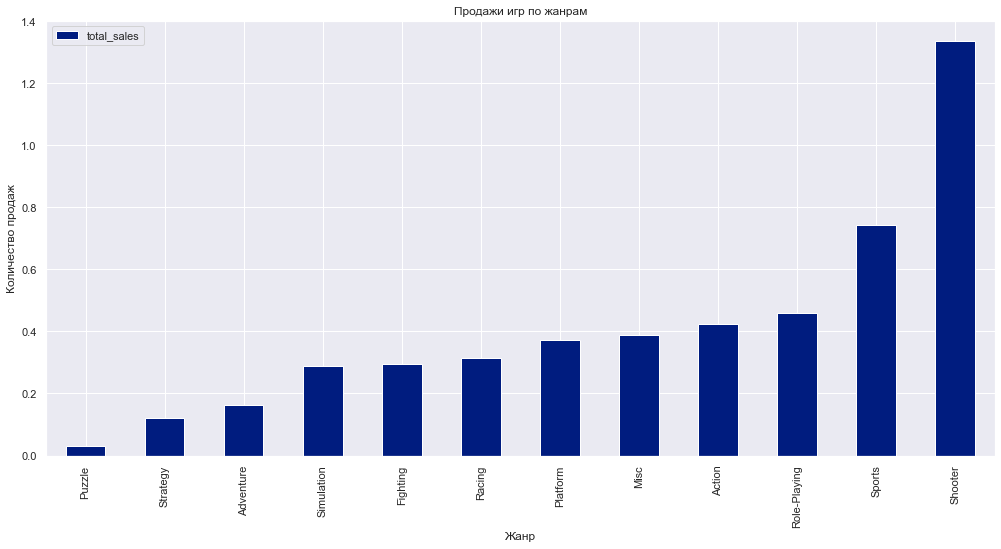

In [45]:

goodest_data.pivot_table(index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales').plot.bar()
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим, самые продаваемые жанры, это те, в которые легко играть на приставках, что коррелируется с выводами полученными раннее. 

А самые плохо продаваемые жанры это пазлы и стратегии, так как пазлы сейчас в целом менее популярный жанр для стационарной игры, а стратегии например по сути нишевый жанр для PC.

#### Вывод

Мы можем увидеть рост количества выпущеннных игр в 2002 году. Однако на самом деле, нужно понимать, что игр ранее выходило на самом деле намного больше, просто из за более слабо развитого интернета, множество релизов просто не осталось в базах данных. Но можно сказать что так как мы анализируем то, что есть. Правильней будет отсечь игры до 2001 года.

Но осмотр датафрейма, показал, что старое поколение консолей подходит к концу, по этому лучше взять данные с 2014 года.
Следовательно мы откидываем все значения до 2014 года. Так как релизы прошлых лет происходили на более не актуальные платформы и могут исказить информацию, так как в разные периоды времени популярные разные жанры игр и разная культура потребления, кроме того чем старше игра тем больше продаж она набирает с течением времени, что так же может исказить выводы.

По каждой платформе с суммарным числом продаж 10 млн +, с играми вышедшими после 2014 года, выбр мы можем сделать следующие выводы:


- 3DS - Продажи с 2014 года падают 
- PС - Исторически продажи в данном рынке достаточно стабильны, но небольшие, виден явный нисходящий тренд
- PS3 - В 2017 году будет полностью неактуальна, так как заменяется на PS4
- PS4 - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год.
- PSP - Продажи с 2014 года падают
- WiiU - Продажи с 2014 года падают
- X360 - К 2017 будет почти полностью заменена на XOne, виден сильный нисходящий тренд
- XOne - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год. Однако рост медленнее чем у PS4


В рамках поставленной задачи, необходимо оставить только платформы, которые актуальны на текущий момент. Либо их жизненный цикл подходит к концу, это :
- PC
- PS3
- PS4
- X360
- XOne

В дальшнейшем мы будем изучать именно эти платформы.

Посчитав корреляцию между числом продаж и оценками критиков и игроков, что лучше всего на продажи влияет оценка критиков, а не оценка игроков. Причем оценка критиков и оценки игроков тесно взаимосвязаны, это связано с тем, что критики как игроки могут поддаться общему ажиотажу, так и игроки услышав лидера мнений, начинают копировать его поведение. Так же нужно понимать, что крупнейшие продажи делаются в первые недели, к этому моменту у игры не успеет появиться большое число отзывов, а вот журналисты, ознакомились раньше с играми.

Самые продаваемые жанры - спортивные игры и шутеры то есть те, в которые легко играть на приставках, что коррелируется с числом продаж на платформах. 

А самые плохо продаваемые жанры это пазлы и стратегии, так как пазлы сейчас в целом менее популярный жанр для станционарной игры, а стратегии например по сути нишевый жанр для PC.

### Портрет пользователя каждого региона

Расчитаем для каждого региона, самые популярные платформы, самые популярные жанры и влияют ли рейтинги ESRB на продажи в регионах.

In [46]:
display(goodest_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,999,9990,999,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,83,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,999,9990,999,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,999,9990,M,0.01
16403,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,999,9990,999,0.01
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,999,9990,999,0.01
16421,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,76,M,0.01


#### Регион Япония

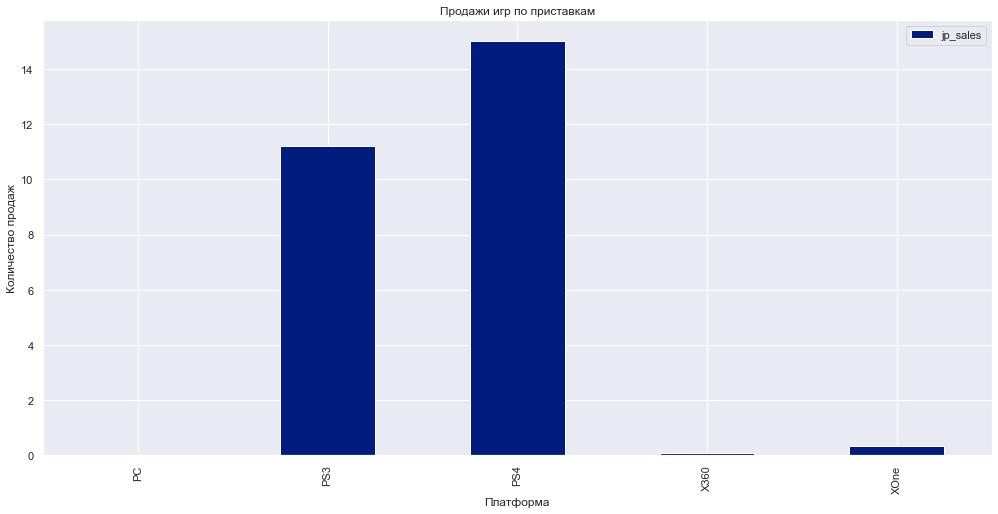

In [47]:
goodest_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по приставкам
plt.title('Продажи игр по приставкам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим, японцы патриоты, и больше играют на родной платформе от Sony. И практически не играют на Xbox. Странно что в выборку не попали компьютерные игры, но с большой долей вероятности это связано с причинами озвученными выше (некорректная выгрузка части игр)

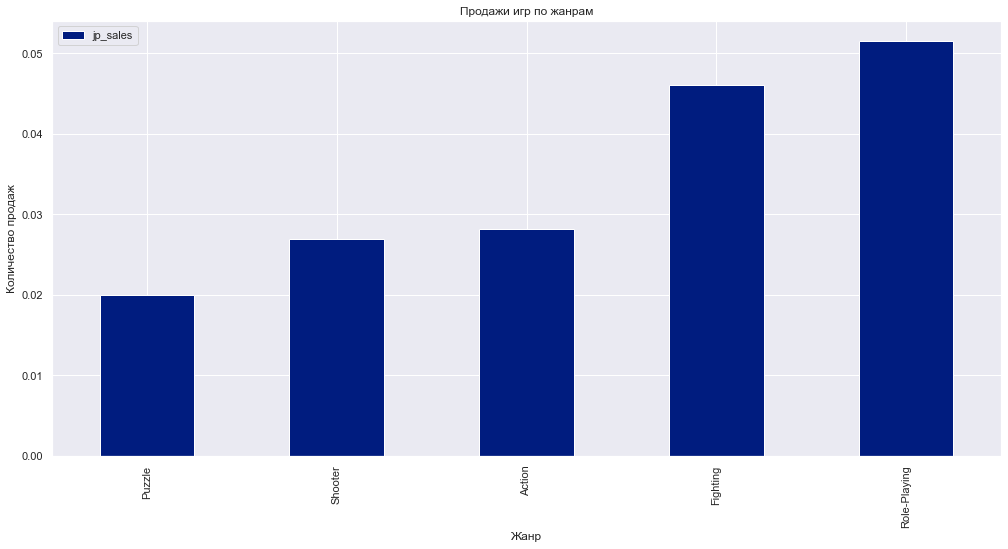

In [48]:
(
    goodest_data.pivot_table(index='genre', values='jp_sales', aggfunc='mean').query('jp_sales > 0.015')
    .sort_values(by='jp_sales').plot.bar()
)  #Проанализируем продажи по жанрам
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Японцы больше играют в жанры Role-Playing и файтинги, что логично, так как это родина JRPG и такой серии как Street Fighter например.
Так же можно заметить, что в топ 5 по средним продажам попали пазлы.

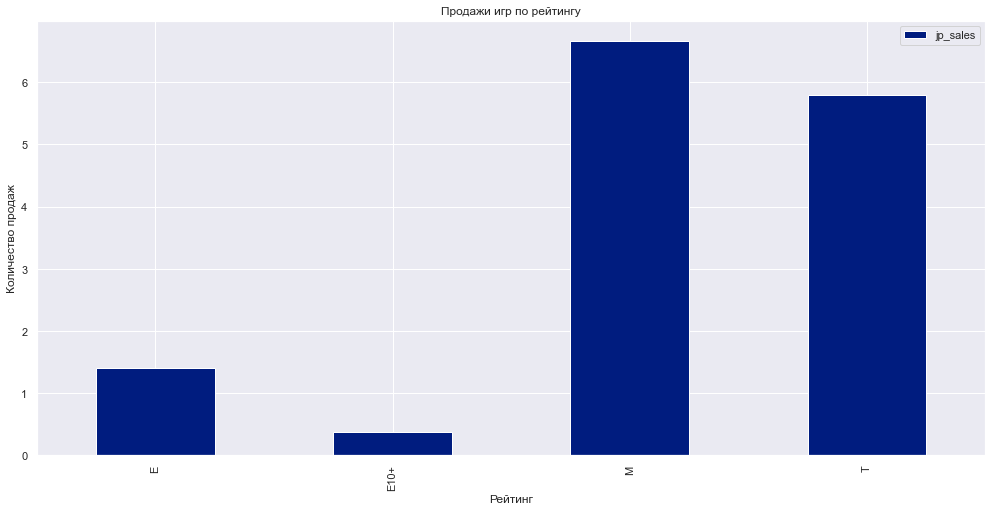

In [49]:
goodest_data.query('rating != 999').pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по рейтингу
plt.title('Продажи игр по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим несмотря на то, высокий рейтинг игр Mature, они же являются самыми популярными, как и Teen. Скорее всего рейтинги слабо работают в Японии

#### Регион Северная Америка

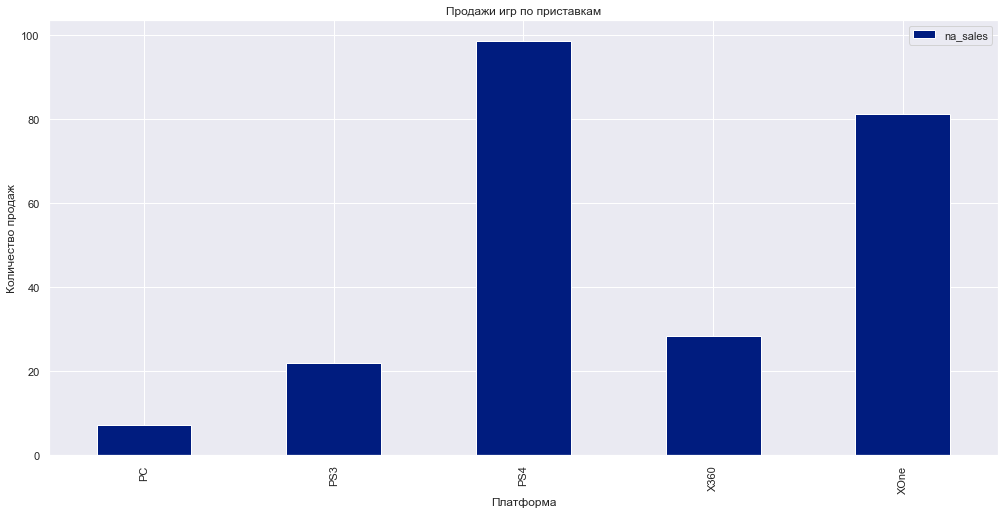

In [50]:
goodest_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').plot.bar()  #Проанализируем продажи по приставкам
plt.title('Продажи игр по приставкам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Северной Америке более популярен PlayStation 4 так же популярней чем Xbox One. И наконец появилась статистика по персональным компьютера, который замыкает топ-5.

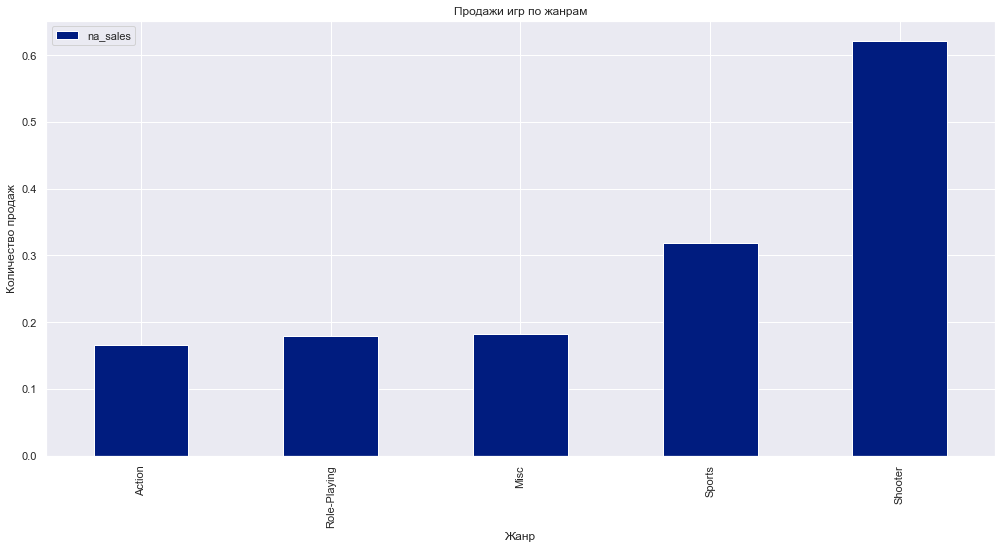

In [51]:
(
    goodest_data.pivot_table(index='genre', values='na_sales', aggfunc='mean').query('na_sales > 0.15')
    .sort_values(by='na_sales').plot.bar()
)  #Проанализируем продажи по жанрам
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим в Америке больше популярны Шутеры и Спортивные игры, замыкает топ 5 различные Экшн игры

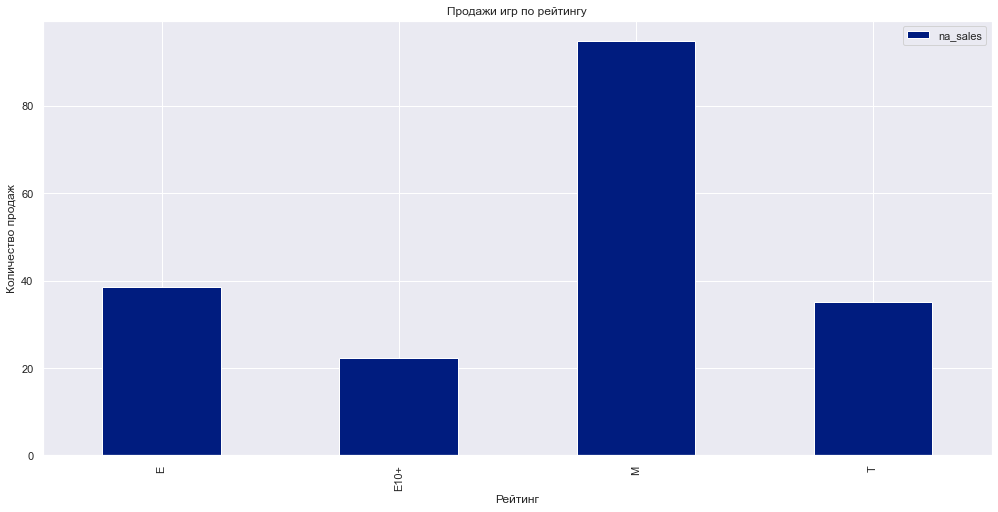

In [52]:
goodest_data.query('rating != 999').pivot_table(index='rating', values='na_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по рейтингу
plt.title('Продажи игр по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим несмотря на то, высокий рейтинг игр Mature, они же являются самыми популярными, однако дальше идут игры +6 лет. Рейтинги большен работают в Америке чем в Японии.

#### Регион Европа

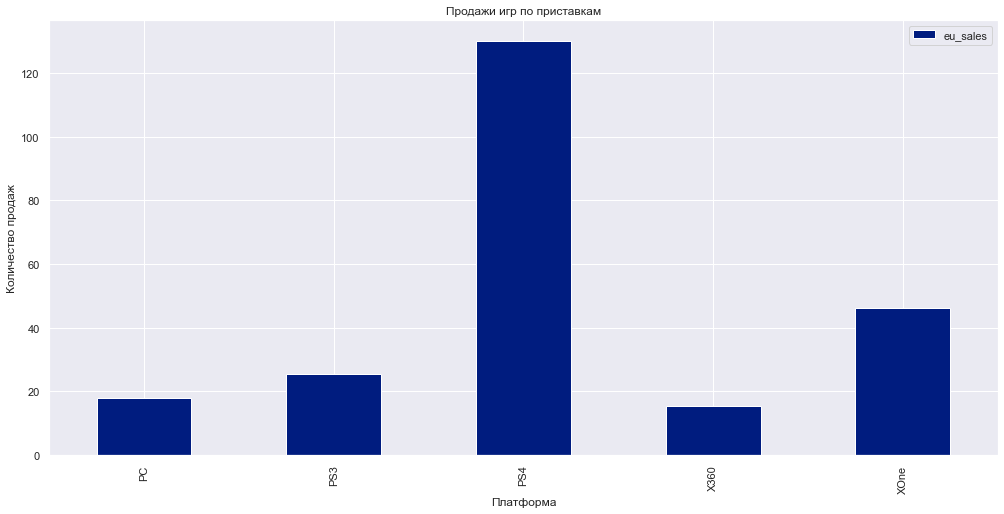

In [53]:
goodest_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').plot.bar()  #Проанализируем продажи по приставкам
plt.title('Продажи игр по приставкам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В Европе PS4 популярнее всех платформ на порядок. Замыкает топ-5 слабое проникновение уходящей Xbox 360

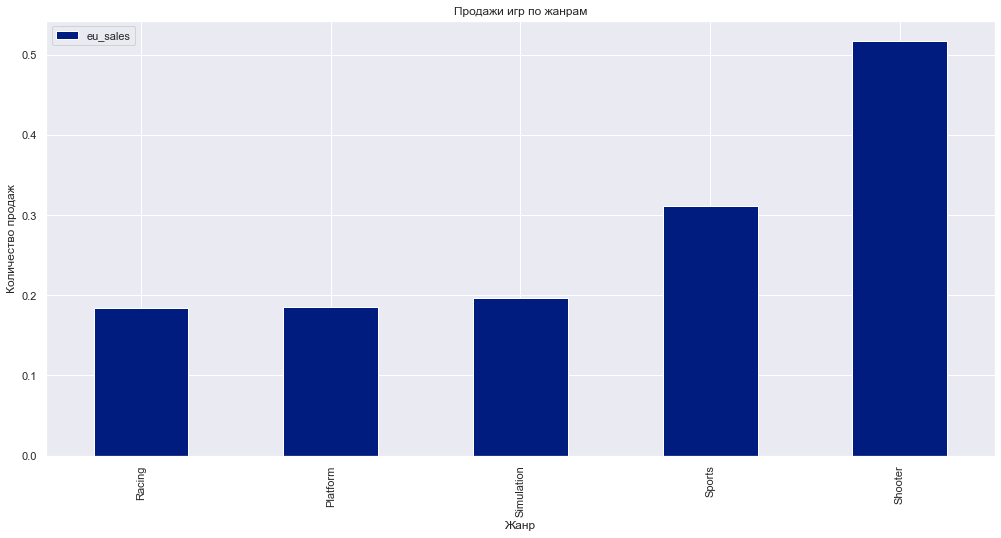

In [54]:
(
    goodest_data.pivot_table(index='genre', values='eu_sales', aggfunc='mean').query('eu_sales > 0.18')
    .sort_values(by='eu_sales').plot.bar()  #Проанализируем продажи по жанрам
)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

Как и в Америке в Евпропе популярны Шутеры и Спортивные игры, однако так же неожиданно популярны симуляторы, платформеры и гоночные игры.

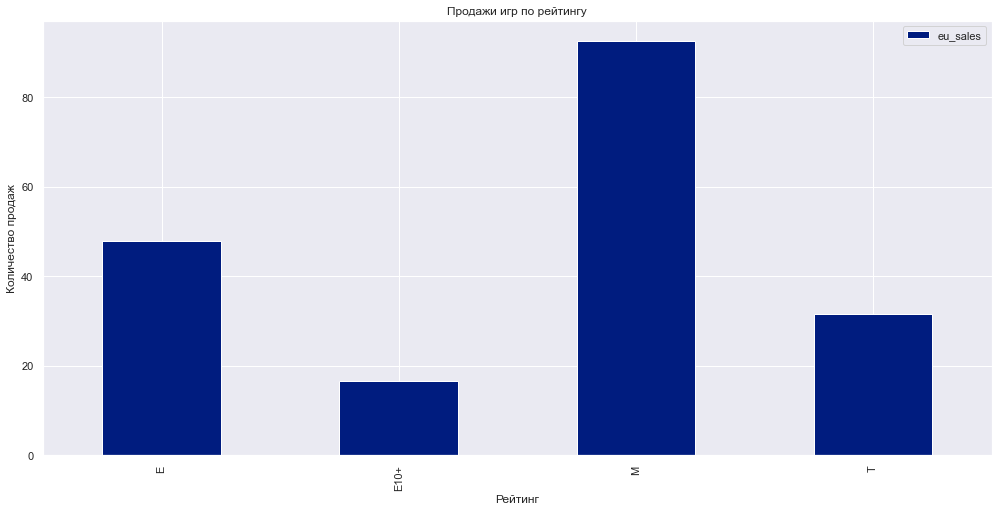

In [55]:
goodest_data.query('rating != 999').pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по рейтингу
plt.title('Продажи игр по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим несмотря на то, высокий рейтинг игр Mature, они же являются самыми популярными, однако дальше идут игры +6 лет. Рейтинги большен работают в Европе чем в Японии и примерно так же как и в Америке

#### Другие регионы

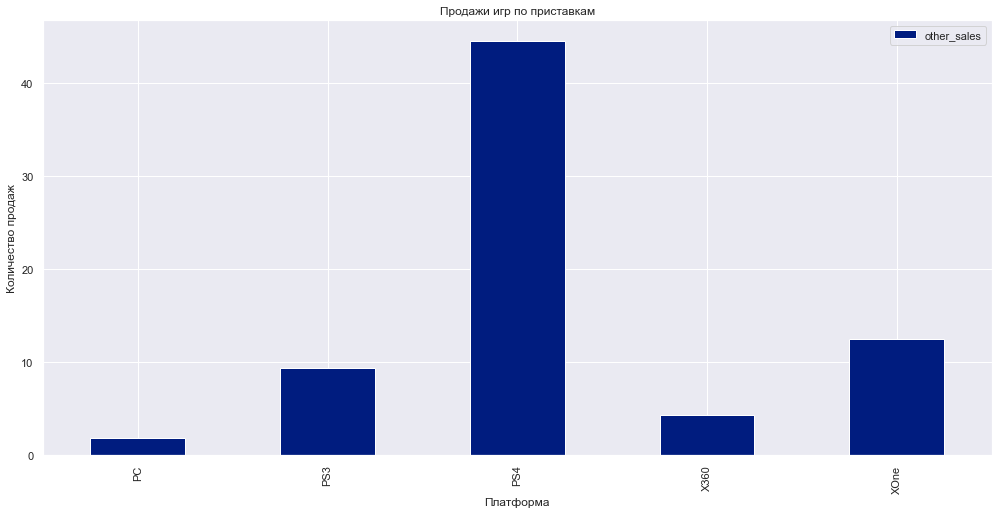

In [56]:
goodest_data.pivot_table(index='platform', values='other_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по приставкам
plt.title('Продажи игр по приставкам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.show()

В остальном мире в сильно более популярна японская приставка. Остальные показатели такие же как в целом по миру.

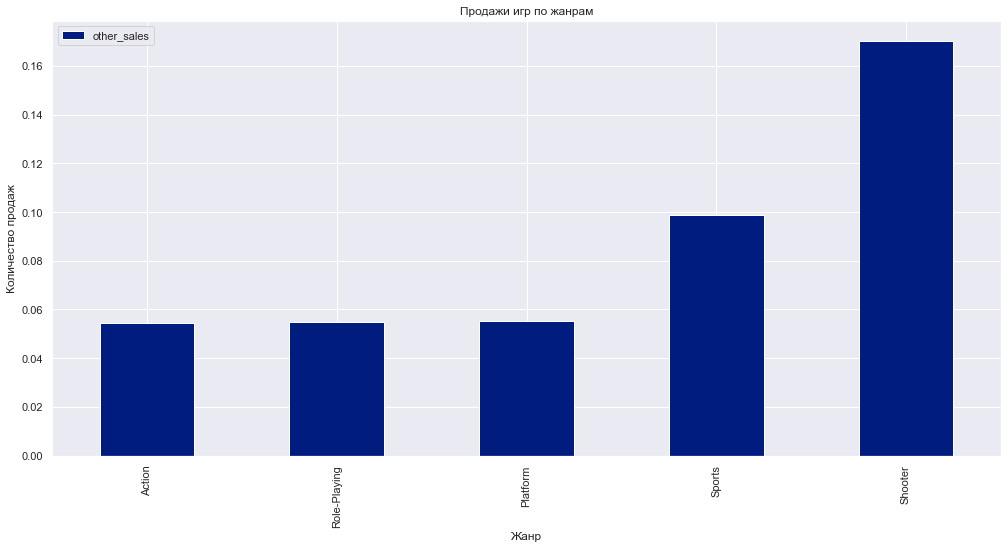

In [57]:
(
    goodest_data.pivot_table(index='genre', values='other_sales', aggfunc='mean').query('other_sales > 0.052')
    .sort_values(by='other_sales').plot.bar() #Проанализируем продажи по жанрам
)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.show()

В остальном мире, так же самыми популярными являются Шутеры и Спортивные игры. Замыкает топ-5 Экшн игры.

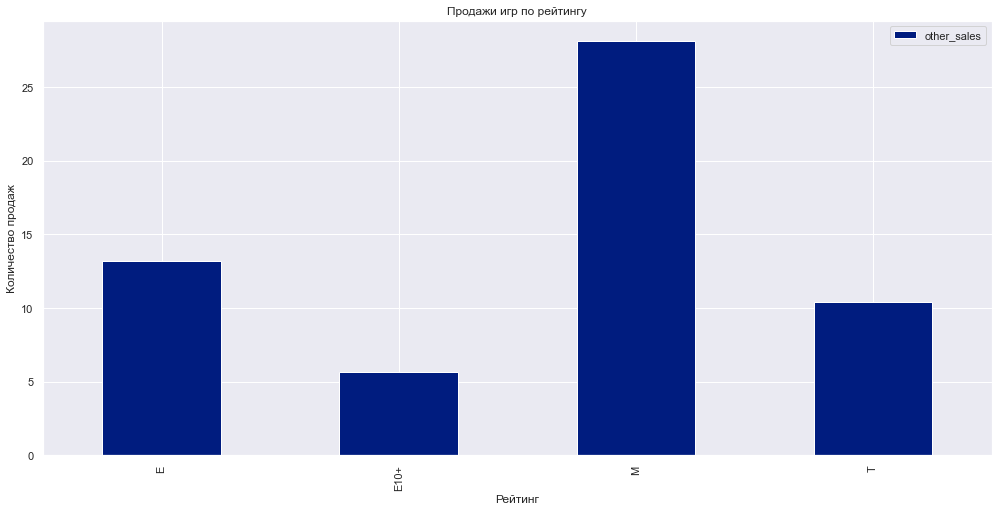

In [58]:
goodest_data.query('rating != 999').pivot_table(index='rating', values='other_sales', aggfunc='sum').plot.bar() #Проанализируем продажи по рейтингу
plt.title('Продажи игр по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

Как мы видим несмотря на то, высокий рейтинг игр Mature, они же являются самыми популярными, однако дальше идут игры +6 лет. Рейтинги большен работают в во всем мире чем в Японии.

#### Вывод

Из приставок в наиболее популярна PlayStation 4, замыкает топ 5 PC 

Говоря о жанрах, спортивные игры и шутеры правят балом почти во всем мире, сдавая в Японии JRPG. Кроме Европы, там больше любят РПГ, чем шутеры, но так же любят спортивные игры

Рейтинговая система явно плохо работает в Японии и работает в остальном мире. Самой большой популярностью пользуются игры с рейтингом M, дальше обычно E или T. 


### Проверка гипотез


#### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Данный вопрос, это t-тест, о сравнении двух генеральных совокупностей. Перед расчетом гипотезы узнаем размеры выборок и оценим дисперсию.

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** Пользовательские рейтинги платформ Xbox One и PC различаются, она принята альтернативной, как противоречащая нулевой.

alpha = 0.05

In [59]:
xone = goodest_data.query('platform == "XOne" and user_score < 999') #Создадим датафрейм для нужной платформы
print('Размер выборки Xbox One', len(xone['user_score']))
print('Дисперсия выборки Xbox One', xone['user_score'].var())
pc = goodest_data.query('platform == "PC" and user_score < 999') #Создадим датафрейм для нужной платформы
print('Размер выборки PC', len(pc['user_score']))
print('Дисперсия выборки PC:', pc['user_score'].var())

Размер выборки Xbox One 165
Дисперсия выборки Xbox One 189.10066518847012
Размер выборки PC 122
Дисперсия выборки PC: 290.11543151334496


Размеры выборки сильно отличаются как и дисперсии. Примем при t-тесте, что дисперсии разные

In [60]:
alpha = 0.05 # Задаем коэфф значимости


results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False) # Проводим t тест о равенстве генеральных совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668922
Не получилось отвергнуть нулевую гипотезу


#### Вывод

У нас не получилось отвергнуть нулевую гипотезу так как считается, что шанс ошибки первого рода (отвергли гипотезу при ее правильности, равен 1.1%). Следовательно мы можем отвергнуть ее. Следовательно мы считаем, что средние пользовательские оценки у Xbox и PC равны.
Это легко объяснить, так как хорошие и плохие игры выходят на все платформы, а пользователи ставят оценки именно для той платформы, на которой играют, а значит их средняя оценка будет стремиться к одному и тому же значению.

#### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.

Данный вопрос, это t-тест, о сравнении двух генеральных совокупностей. Перед расчетом гипотезы узнаем размеры выборок и оценим дисперсию.

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Action и Sports одинаковые

**Альтернативная гипотеза:** Пользовательские рейтинги платформ Action и Sports разные, она принята альтернативной, как противоречащая нулевой.

alpha = 0.05

In [61]:
action = goodest_data.query('genre == "Action" and user_score < 999') #Создадим датафрейм для нужного жанра
print('Размер выборки Action', len(action['user_score']))
print('Дисперсия выборки Action', action['user_score'].var()) 
sports = goodest_data.query('genre == "Sports" and user_score < 999') #Создадим датафрейм для нужного жанра
print('Размер выборки Sports', len(sports['user_score']))
print('Дисперсия выборки Sports:', sports['user_score'].var())

Размер выборки Action 223
Дисперсия выборки Action 180.17868541186925
Размер выборки Sports 119
Дисперсия выборки Sports: 332.94559179604056


Размеры выборки сильно отличаются как и дисперсии. Примем при t-тесте, что дисперсии разные

In [62]:
alpha = 0.05 # Задаем коэфф значимости


results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False) # Проводим t тест о равенстве генеральных совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.215251159154759e-13
Отвергаем нулевую гипотезу


#### Вывод

Мы отвергаем нулевую гипотезу так как считается, что шанс ошибки первого рода (отвергли гипотезу при ее правильности, стремится к нулю (Равен 3.21 * 10**-13). Следовательно мы можем отвергнуть ее. Следовательно мы считаем, что средние пользовательские оценки у Экшн и Спортивных игр не равны.
Это легко объяснить, так спортивные игры по сути заняты несколькими сериями, которые выпускают новую игру каждый год, из за чего пользовательские оценки в среднем отличаются от большего количества экшн игр.

### Общий Вывод

В результате обработки данных, мы обратили внимание, что есть часть данных, которая отражает несуществующие игры, с неправильными датами выхода, жанрами и платформами. Зачастую эти игры находятся среди старых игр. 

Это приводит нас к необходимости отрезать старые данные, чтобы избежать попадая лишних значений, так как неизвестно, ошибка там только в названии или во всех данных в целом.

Мы можем увидеть рост количества выпущеннных игр в 2002 году. Однако на самом деле, нужно понимать, что игр ранее выходило на самом деле намного больше, просто из за более слабо развитого интернета, множество релизов просто не осталось в базах данных. Но можно сказать что так как мы анализируем то, что есть. Правильней будет отсечь игры до 2001 года.

Но осмотр датафрейма, показал, что старое поколение консолей подходит к концу, по этому лучше взять данные с 2014 года.
Следовательно мы откидываем все значения до 2014 года. Так как релизы прошлых лет происходили на более не актуальные платформы и могут исказить информацию, так как в разные периоды времени популярные разные жанры игр и разная культура потребления, кроме того чем старше игра тем больше продаж она набирает с течением времени, что так же может исказить выводы.

По каждой платформе с суммарным числом продаж 10 млн +, с играми вышедшими после 2014 года, выбр мы можем сделать следующие выводы:


- 3DS - Продажи с 2014 года падают 
- PС - Исторически продажи в данном рынке достаточно стабильны, но небольшие, виден явный нисходящий тренд
- PS3 - В 2017 году будет полностью неактуальна, так как заменяется на PS4
- PS4 - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год.
- PSP - Продажи с 2014 года падают
- WiiU - Продажи с 2014 года падают
- X360 - К 2017 будет почти полностью заменена на XOne, виден сильный нисходящий тренд
- XOne - Количество продаж растет с ростом популярности приставки, падение продаж скорее всего связано с тем, что в датафрейме нам доступен не весь 2016 год. Однако рост медленнее чем у PS4


В рамках поставленной задачи, необходимо оставить только платформы, которые актуальны на текущий момент. Либо их жизненный цикл подходит к концу, это :
- PC
- PS3
- PS4
- X360
- XOne

В дальшнейшем мы будем изучать именно эти платформы.

Посчитав корреляцию между числом продаж и оценками критиков и игроков, что лучше всего на продажи влияет оценка критиков, а не оценка игроков. Причем оценка критиков и оценки игроков тесно взаимосвязаны, это связано с тем, что критики как игроки могут поддаться общему ажиотажу, так и игроки услышав лидера мнений, начинают копировать его поведение. Так же нужно понимать, что крупнейшие продажи делаются в первые недели, к этому моменту у игры не успеет появиться большое число отзывов, а вот журналисты, ознакомились раньше с играми.

Самые продаваемые жанры - спортивные игры и шутеры то есть те, в которые легко играть на приставках, что коррелируется с числом продаж на платформах. 

А самые плохо продаваемые жанры это пазлы и стратегии, так как пазлы сейчас в целом менее популярный жанр для станционарной игры, а стратегии например по сути нишевый жанр для PC.

Из приставок в Японии, Европе и остальном мире более популярна Sony Playstation 4 с большим отрывом

Говоря о жанрах, спортивные игры и шутеры правят балом почти во всем мире, сдавая в Японии JRPG и файтингам, так же выбивается Европа, где вместо шутеров больше любят ролевые игры. 

Самые продаваемые игры с рейтингом M и T или E.

**Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

У нас не получилось отвергнуть нулевую гипотезу так как считается, что шанс ошибки первого рода (отвергли гипотезу при ее правильности, равен 1.1%). Следовательно мы можем отвергнуть ее. Следовательно мы считаем, что средние пользовательские оценки у Xbox и PC равны.
Это легко объяснить, так как хорошие и плохие игры выходят на все платформы, а пользователи ставят оценки именно для той платформы, на которой играют, а значит их средняя оценка будет стремиться к одному и тому же значению.


**Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.**


Мы отвергаем нулевую гипотезу так как считается, что шанс ошибки первого рода (отвергли гипотезу при ее правильности, стремится к нулю (Равен 3.21 * 10**-13). Следовательно мы можем отвергнуть ее. Следовательно мы считаем, что средние пользовательские оценки у Экшн и Спортивных игр не равны.
Это легко объяснить, так спортивные игры по сути заняты несколькими сериями, которые выпускают новую игру каждый год, из за чего пользовательские оценки в среднем отличаются от большего количества экшн игр.

**Финальные рекомендации маркетинговому отделу**

В 2017 году будет увеличиваться роль приставок нового поколения. PS4 c точки зрения продаж растет активнее. Лучше сосредоточить рекламные бюджеты именно в этой платформе.

Для продвижения лучше выбрать те игры, которые легко играются на консолях и не требуют большого количества времени для игровой сессии. Во всем мире кроме Японии лучше продвигать Шутеры и Спортивные игры, но в Японии лучше сосредоточиться на Файтингах и RPG.

Выбирая между работой с пользователями и прессой, лучше сосредоточиться на прессе, так как их оценки сильнее влияют на продажи. Сообщество при грамотной работе с прессой, само начнет ждать игру.

## Чек лист

- [x] Открыть файл. Изучить датасет
  - [x] Спланировать дальнейшую обработку датасета:
- [x] Подготовить данные
  - [x] Замените названия столбцов (приведите к нижнему регистру);
  - [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
  - [x] Обработайте пропуски при необходимости:
  - [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - [x] Опишите причины, которые могли привести к пропускам;
  - [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
  - [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- [x] Проведите исследовательский анализ данных
    - [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - [x] Не учитывайте в работе данные за предыдущие годы.
    - [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    - [x] Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    - [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    - [x] Соотнесите выводы с продажами игр на других платформах.
    - [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x] Определите для пользователя каждого региона (NA, EU, JP):
    - [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - [x] Самые популярные жанры (топ-5). Поясните разницу.
    - [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- [x] Проверьте гипотезы
    - [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    - [x] Описано как формулировались гипотезы
    - [x] Описан выбор критерия
- [x] Есть общий вывод
- [x] Есть выводы к каждым шагам
